In [46]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# DreamPlace Algorithms

This notebook tries to reproduce some of the functionality of
the DreamPlace paper

There there are three important algorithms:

* Global Placement (GP)
* Legalization (LG)
* Detailed Placement (DP)

OBS: Implementation below only talk about x direction. The same can be achieve for the y direction.

### Notations:

* V : set of cells
* P : set of pins
* E : set of nets
* B : set of bins


* $x_e^+$ : $max_{i \in e} x_i, \forall e \in E$
* $x_e^-$ : $min_{i \in e} x_i, \forall e \in E$


* $a_i^+$ : $e^\frac{x_i-x_e^+}{\gamma}, \forall i\in e, e \in E$
* $a_i^-$ : $e^\frac{x_i-x_e^-}{\gamma}, \forall i\in e, e \in E$


* $b_e^+$ : $\sum_{i \in e}  a^+, \forall e \in E$
* $b_e^-$ : $\sum_{i \in e}  a^-, \forall e \in E$


* $c_e^+$ : $\sum_{i \in e} x_i a^+, \forall e \in E$
* $c_e^-$ : $\sum_{i \in e} x_i a^-, \forall e \in E$


* $\vec x^+$ : $\{x_e^+\}, \forall e \in E$
* $\vec x^-$ : $\{x_e^-\}, \forall e \in E$


* $\vec a^+$ : $\{a_e^+\}, \forall e \in P$
* $\vec a^-$ : $\{a_e^-\}, \forall i \in P$


* $\vec b^+$ : $\{b_e^+\}, \forall e \in E$
* $\vec b^-$ : $\{b_e^-\}, \forall e \in E$


* $\vec c^+$ : $\{c_e^+\}, \forall e \in E$
* $\vec c^-$ : $\{c_e^-\}, \forall e \in E$

### Process

With the variables below, the GP problem becomes:

* $WL$ - Function that calculates Wirelength cost function
  * Takes any net $e$ and returns wirelenght
* $D$ -  Regularization function (density penalty to spread out cells)

$min(\sum_{e\in E} WL(e;\vec{x},\vec{y} +\alpha D(\vec{x},\vec{y})$

In [2]:
# TODO

Actual used formula: Weighted-average wirelength

$WA_e=\frac{\sum_{i \in e} x_i e^{\frac{x_i}{\gamma}}}{\sum_{i \in e} e^{\frac{x_i}{\gamma}}}$
$-\frac{\sum_{i \in e} x_i e^{\frac{-x_i}{\gamma}}}{\sum_{i \in e} e^{\frac{-x_i}{\gamma}}}$


With:

* $\gamma$ - parameter to control the smoothness and accuracy of the approximation to half-permieter wirelenght (HPWL)

In [3]:
# TODO

### Steps:

Initial placement: Standard cells are placed in the center of the layout with a small Gaussian noise.
The scales of noise are set to 0.1% of the width and height of the placement region in the experiment.


GP: GlobalPlacement Iterations: Loop that involves the computation of wirelength and density gradient, optimization engines, and cell location updating.

LG: Legalization is performed to remove remaining overlaps and align cells to placements sites

DP: Detailed placement to refine the placement solutions using NTUplace3.

In [4]:
# TODO

# Data generation

In [332]:
import random
import string

def generate_random_name():
    output = ''.join([random.choice(string.ascii_letters).upper() for n in range(3)])
    output = output+"_"+"".join([random.choice(string.digits) for n in range(2)])
    return output

def generate_random_position(grid_dim=(200,200), mode='uniform'):
    x=grid_dim[0]/2
    y=grid_dim[0]/2
    
    if (mode=='gaussian'):
        x=np.floor(random.gauss(mu=x,sigma=x/10))
        y=np.floor(random.gauss(mu=x,sigma=x/10)) 
    else:
        x=np.floor(random.random()*grid_dim[0])
        y=np.floor(random.random()*grid_dim[1])
    return x,y

def generate_random_sizes(size_l_lim=1,size_u_lim=10, mode='uniform'):
    w=size_l_lim
    h=size_l_lim
    
    size_range=size_u_lim-size_l_lim

    if (mode=='triangular'):
        #params=(size_l_lim, size_l_lim+size_range*.1, size_u_lim, 1)
        w=np.floor(random.triangular(size_l_lim, size_l_lim+size_range*.3, size_u_lim))
        h=np.floor(random.triangular(size_l_lim, size_l_lim+size_range*.3, size_u_lim))
    else:
        w=np.floor(random.random()*size_range+size_l_lim)
        h=np.floor(random.random()*size_range+size_l_lim)
    
    return w,h

print(generate_random_name())
print(generate_random_position())
print(generate_random_sizes())
print(generate_random_sizes(mode='triangular'))

UTL_69
(49.0, 195.0)
(8.0, 7.0)
(5.0, 3.0)


In [316]:
random.triangular(0, 4, 10)

5.977274150734704

In [350]:
import numpy as np

# Here we consider that we have a set of V cells first allocated at random position on a 
# 200mm X 200mm grid
grid_dim = (200,200)
N_COMPONENTS=10

# Generate Components names
components_set = {generate_random_name() for x in range(N_COMPONENTS)}

# Generate Inter Componenet connection
adjacency_matrix = np.random.choice([0, 1], size=(N_COMPONENTS,N_COMPONENTS), p=[4./5, 1./5])
adjacency_matrix[np.identity(N_COMPONENTS, dtype=bool)]=1

# Generate Componenets X,Y valuesmode
#position_array = np.array([generate_random_position(mode='gaussian') for _ in range(N_COMPONENTS)])
position_array = np.array([generate_random_position(mode='uniform') for _ in range(N_COMPONENTS)])

# Generate Compinents Sizes W and H (size_x,size_y)
dimension_array = np.array([generate_random_sizes(5,30,mode='triangular') for _ in range(N_COMPONENTS)])

In [351]:
print(components_set)
print(adjacency_matrix)
print(position_array)
print(dimension_array)

{'RDU_61', 'NQK_41', 'OHX_20', 'QGJ_08', 'AVE_44', 'DLH_93', 'UDE_59', 'ERL_94', 'ZJM_70', 'WBT_63'}
[[1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 1 1 1]
 [0 1 0 1 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 1 1 1 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 1]]
[[107.  73.]
 [156. 159.]
 [ 41. 195.]
 [  6. 103.]
 [ 85.  53.]
 [161.  33.]
 [ 42.  32.]
 [ 14.  58.]
 [182. 199.]
 [ 19. 169.]]
[[17. 17.]
 [10. 17.]
 [ 9. 16.]
 [11. 15.]
 [ 9.  8.]
 [17. 17.]
 [15. 14.]
 [14. 17.]
 [13. 14.]
 [15. 15.]]


### Plotting initial data

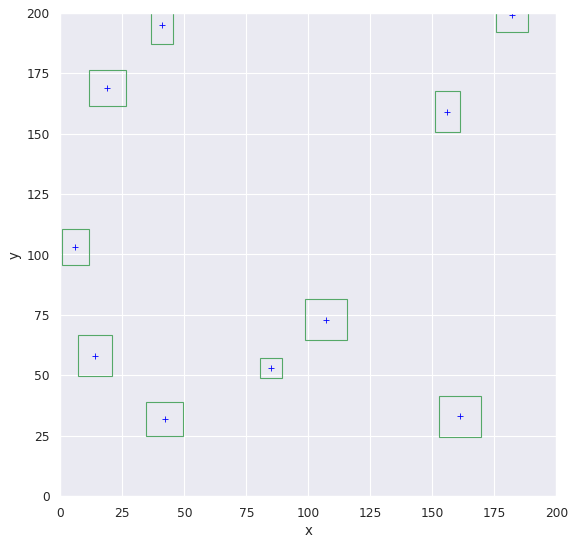

In [352]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
sns.set()
# Create dataframe
df = pd.DataFrame({
    'x': position_array[:,0],
    'y': position_array[:,1],
    'w': dimension_array[:,0],
    'h': dimension_array[:,1],
    'group': list(components_set)
})
 
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
p1 = sns.scatterplot(data=df, x="x", y="y", marker="+", color="blue")


plt.xlim(0, grid_dim[0])
plt.ylim(0, grid_dim[1])

# add annotations one by one with a loop
#for line in range(0,df.shape[0]):
#     p1.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black')


ax = plt.gca()

for line in range(0,df.shape[0]):
    ax.add_patch(Rectangle((df.x[line]-df.w[line]/2, df.y[line]-df.h[line]/2), df.w[line], df.h[line], fill=None, alpha=1,color='g'))
plt.show()


plt.show()